# Feature Importance 
(by Tevfik Aytekin)

Feature importance methods try to measure the importance of a single feature in a given model. Different methods have been proposed to measure feature imprtance which sometimes produce inconsistent results. That is, a feature which has a high score with respect to one method might have a low score with respect to another. This might seem to be a problematic situation but it is not. The notion of "importance" is a vague concept, every measure defines importance in its own way. So, every measure is correct by itself as long as it is not against our intuitions about the concept of importance. Therefore, while using these measures one should understand what exactly the method is measuring in order to better interpret the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_log_error
from sklearn import tree
from IPython.display import Image  
from sklearn.inspection import PartialDependenceDisplay
from sklearn.base import is_classifier, is_regressor
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import Image  
from numpy import linalg
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import random
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import xgboost
from sklearn.pipeline import Pipeline
import seaborn as sns
plt.rcParams["figure.dpi"] = 75



def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

###Dataset

In [3]:
adult = pd.read_csv("../../datasets/adult/adult.csv", delimiter=",", skipinitialspace=True)
adult = adult.drop(columns=['fnlwgt'])
print("Adult Shape:", adult.shape)
adult.head(5)

Adult Shape: (32561, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- age: The age of the individuals

- workclass: A general term to represent the employment status of an individual

- education: The highest level of education achieved by an individual.

- education_num: the highest level of education achieved in numerical form.

- marital_status: marital status of an individual.

- occupation: the general type of occupation of an individual

- relationship: whether the individual is in a relationship-

- race: Descriptions of an individual’s race

- sex: the biological sex of the individual

- captain-gain: capital gains for an individual

- captain-loss: capital loss for an individual

- hours-per-week: the hours an individual has reported to work per week

- target: whether or not an individual makes more than $50,000 annually

In [150]:
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' ]
categorical_features = ['y', 'marital-status', 'workclass', 'race', 'sex', 'relationship', 'occupation', 'education', 'native-country']

for column in categorical_features:
    unique_values = adult[column].unique()
    print(f"{column}: {unique_values}")

y: ['<=50K' '>50K']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'H

### One Hot Encoding

In [4]:
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", encoder, categorical_features),
    ]
).set_output(transform="pandas")

adult_encoded = preprocessor.fit_transform(adult)


In [5]:
adult_encoded

,cat__y_>50K,cat__marital-status_Divorced,cat__marital-status_Married-AF-spouse,cat__marital-status_Married-civ-spouse,cat__marital-status_Married-spouse-absent,cat__marital-status_Never-married,cat__marital-status_Separated,cat__marital-status_Widowed,cat__workclass_?,cat__workclass_Federal-gov,...,cat__native-country_Portugal,cat__native-country_Puerto-Rico,cat__native-country_Scotland,cat__native-country_South,cat__native-country_Taiwan,cat__native-country_Thailand,cat__native-country_Trinadad&Tobago,cat__native-country_United-States,cat__native-country_Vietnam,cat__native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
y = adult_encoded.loc[:,'cat__y_>50K']
#y = adult_encoded.loc[:,'y']
X = adult_encoded.drop(columns=['cat__y_>50K'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier()
#model = RandomForestClassifier()
model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      2455
         1.0       0.64      0.55      0.59       802

    accuracy                           0.81      3257
   macro avg       0.75      0.72      0.73      3257
weighted avg       0.80      0.81      0.81      3257



In [49]:
# X = bank.loc[:,'age':'poutcome']
# X["random_num"] = np.random.rand(X.shape[0])
# X.drop(columns=['duration'], inplace=True)

# y = bank.loc[:,'y']
# y = y.replace(["yes","no"],[1,0])
# X = pd.get_dummies(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())
 
# dt_model = DecisionTreeClassifier(max_depth=5)
# dt_model.fit(X_train, y_train);

# y_pred1 = dt_model.predict(X_test)  

# print(classification_report(y_test,y_pred1))

### Impurity based feature importance scores

One definition of impurity based feature importance score for tree based models is as follows: total reduction in impurity brought by the feature (for categorical classes) and total reduction in variance brought by the feature (for numerical classes). 

In [7]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"feature_name":X.columns[sorted_idx], "value":sorted_vals}
imp_df = pd.DataFrame(d)
imp_df[:10]

,feature_name,value
0,cat__marital-status_Married-civ-spouse,0.388622
1,cat__education_Bachelors,0.062724
2,cat__occupation_Prof-specialty,0.062708
3,cat__occupation_Exec-managerial,0.059340
4,cat__education_Masters,0.028839
5,cat__education_Doctorate,0.016435
6,cat__native-country_United-States,0.016109
7,cat__education_Prof-school,0.016086
8,cat__workclass_Self-emp-not-inc,0.015567
9,cat__race_White,0.013978


We can also sum up the importance scores of each categority values.

In [9]:
imps = []
for col in adult.columns:   
    imps.append(sum(imp_df[imp_df['feature_name'].str.contains(f'_{col}_')].value))

sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"feature_name":adult.columns[sorted_idx], "value":sorted_vals}
imp_df = pd.DataFrame(d)
imp_df[:10]

,feature_name,value
0,y,0
1,native-country,0
2,hours-per-week,0
3,capital-loss,0
4,capital-gain,0
5,sex,0
6,race,0
7,relationship,0
8,occupation,0
9,marital-status,0


In the above results we can see that marital-status has the highest importance. To confirm it, we can look at the stacked histogram between marital-status and y.

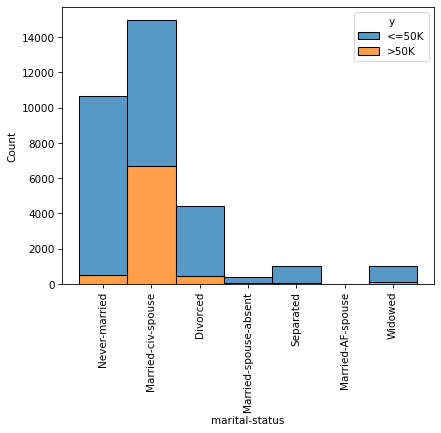

In [10]:
sns.histplot(data=adult, x="marital-status", hue="y", multiple="stack");
plt.xticks(rotation=90);

We can see that those who are not married-civ-spouse strongly tend to earn <=50k. Actually, since the number of married-AF-spouse (armed forces) are quite few, we can think of married-civ-spouse as married ones. The above figure tells us that, if we know that a person is married that does not give much information about the income, but for the ones who are not married we see generally income <= 50K.  

### Ordinal Encoding

Another common way to encode categorical features is ordinal encoding.

In [5]:
encoder = OrdinalEncoder().set_output(transform="pandas")

adult_encoded = encoder.fit_transform(adult)
adult_encoded

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,22.0,7.0,9.0,12.0,4.0,1.0,1.0,4.0,1.0,25.0,0.0,39.0,39.0,0.0
1,33.0,6.0,9.0,12.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,12.0,39.0,0.0
2,21.0,4.0,11.0,8.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,39.0,39.0,0.0
3,36.0,4.0,1.0,6.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,39.0,39.0,0.0
4,11.0,4.0,9.0,12.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,39.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10.0,4.0,7.0,11.0,2.0,13.0,5.0,4.0,0.0,0.0,0.0,37.0,39.0,0.0
32557,23.0,4.0,11.0,8.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,39.0,39.0,1.0
32558,41.0,4.0,11.0,8.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,39.0,39.0,0.0
32559,5.0,4.0,11.0,8.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0,19.0,39.0,0.0


In [6]:
y = adult_encoded.loc[:,'y']
#y = adult_encoded.loc[:,'y']
X = adult_encoded.drop(columns=['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier()
#model = RandomForestClassifier()
model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      2518
         1.0       0.60      0.63      0.62       739

    accuracy                           0.82      3257
   macro avg       0.75      0.75      0.75      3257
weighted avg       0.82      0.82      0.82      3257



In [13]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"feature_name":X.columns[sorted_idx], "value":sorted_vals}
imp_df = pd.DataFrame(d)
imp_df

,feature_name,value
0,relationship,0.214394
1,age,0.175096
2,education-num,0.128770
3,capital-gain,0.128430
4,hours-per-week,0.103347
5,occupation,0.085220
6,workclass,0.048056
7,capital-loss,0.042298
8,native-country,0.021079
9,race,0.019888


It is interesting to note that the "marital-status" feature which has the highest importance in the previous model has almost zero importance in this model. This situation can be explained by Rashomon Effect which states that different subsets of features can lead to equally good models. In this case, the encoding scheme used effected the features that the algorithm uses for model building. Actually as shown below the relationship and marital-status is highly correlated. So, the input representation determines which one will be used by the model.

Below we see that being husband and being married-civ-spouse are higly correlated

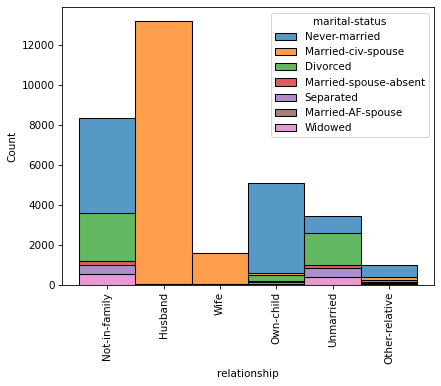

In [14]:
sns.histplot(data=adult, x="relationship", hue="marital-status", multiple="stack");
plt.xticks(rotation=90);

### Feature Importance from scratch

Below we will write our own code for calculating feature importance score. To do that we need to understand some basic concepts and also the tree structure used in sckit-learn.

### Impurity and Variance 

The Gini impurity for a set $S$ with $K$ classes is:

$$
Gini(S) = 1 - \sum_{i=1}^{K} p_i^2
$$

where:
- $S$ is the set of instances.
- $K$ is the number of classes or labels.
- $p_i$ is the relative frequence of class $i$ in $S$.

Examples:

In [15]:
def gini_impurity(freqs):
    gini_imp = 1 - sum(p ** 2 for p in freqs)
    return gini_imp
    
freqs = [0.1, 0.9]
print(gini_impurity(freqs))
freqs = [0.5, 0.5]
print(gini_impurity(freqs))


0.17999999999999994
0.5


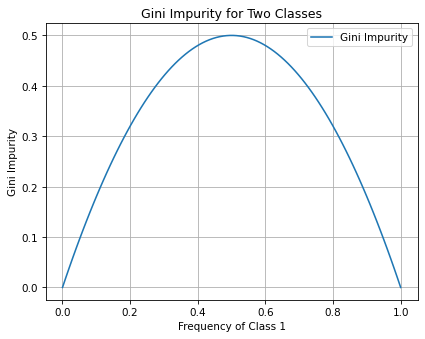

In [16]:
freq_class1 = np.linspace(0, 1, 100)
gini_values = [gini_impurity([p, 1 - p]) for p in freq_class1]

# Plotting
plt.plot(freq_class1, gini_values, label='Gini Impurity')
plt.title('Gini Impurity for Two Classes')
plt.xlabel('Frequency of Class 1')
plt.ylabel('Gini Impurity')
plt.legend()
plt.grid(True)
plt.show()

### sklearn tree structure

The entire binary tree structure is represented as a number of parallel arrays. The i-th element of each array holds information about the node i. Node 0 is the tree’s root. Nunbers are assigned in a depth-first order.

Some of these are:

- children_left[i]: id of the left child of node i or -1 if leaf node

- children_right[i]: id of the right child of node i or -1 if leaf node

- feature[i]: feature used for splitting node i

- threshold[i]: threshold value at node i

- n_node_samples[i]: the number of training samples reaching node i

- impurity[i]: the impurity at node i

For more information:
[sklearn tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)

### Feature importances from scratch

In [49]:
def my_feature_importance(tree, idx, imps, normalized = True):
    """
    :tree: Decision tree built
    :idx: Index of the root of the subtree that the importances will be calculated.
    :imps: feature importances, should be initialized to all zeros 
    :return: imps
    """
    if tree.children_left[idx] > -1:
        imps[tree.feature[idx]]+=(tree.n_node_samples[idx]*tree.impurity[idx] 
        - tree.n_node_samples[tree.children_left[idx]]*tree.impurity[tree.children_left[idx]]
        - tree.n_node_samples[tree.children_right[idx]]*tree.impurity[tree.children_right[idx]])

        my_feature_importance(tree, tree.children_left[idx], imps, normalized)
        my_feature_importance(tree, tree.children_right[idx], imps, normalized)
    
    if normalized:
        return imps/np.sum(imps)
    else:
        return imps

Now, let us check my_feature_importance finds the same importance values as sklearn

In [50]:
imps = np.zeros(model.n_features_in_)
imps = my_feature_importance(model.tree_,0, imps, normalized=True)
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

imps = model.feature_importances_
sk_sorted_idx = np.argsort(imps)[::-1]
sk_sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "sklearn features":X.columns[sk_sorted_idx], "sklearn values":sk_sorted_vals}
pd.DataFrame(d)

,features,values,sklearn features,sklearn values
0,relationship,0.217548,relationship,0.217548
1,age,0.177405,age,0.177405
2,education-num,0.132940,education-num,0.132940
3,capital-gain,0.126119,capital-gain,0.126119
4,hours-per-week,0.104603,hours-per-week,0.104603
5,occupation,0.075953,occupation,0.075953
6,workclass,0.050408,workclass,0.050408
7,capital-loss,0.041546,capital-loss,0.041546
8,native-country,0.021773,native-country,0.021773
9,race,0.020576,race,0.020576


### Building Intuition

In [158]:
model = DecisionTreeClassifier(max_depth=2)
#model = RandomForestClassifier()
model.fit(X, y);

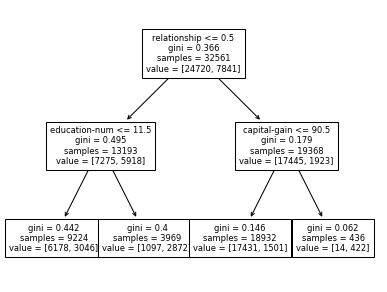

In [159]:
tree.plot_tree(model, feature_names=list(adult.columns), fontsize=8);

In [21]:
rel = 32561*0.366 - (13193*0.495 + 19368*0.179)
edu = 13193*0.495 - (9224*0.442 + 3969*0.4)
cap = 19368*0.179 - (18932*0.146 + 436*0.062)
total = rel + edu + cap
print(rel /total, edu/total, cap/total)

0.554631163382168 0.25015123003315787 0.19521760658467413


In [22]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)[:3]

,features,values
0,relationship,0.555543
1,education-num,0.249182
2,capital-gain,0.195275


### Inconsistent results
There are different ways to measure feature importances of a tree model. These give inconsistent results. Following are different ways of measuring importance in XGBoost:

”weight” is the number of times a feature appears in a tree

”gain” is the average gain of splits which use the feature

”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

This is a nice example to show that there is no single way to define feature importance. Having different definitions is not a problem if you know what the definitions are and their implied properties. Otherwise the interpretation of the results might not be correct. Moreover, different definitions might not be consistent which each other. That is, a feature which turns out to be very important with respect to one definition might not be that much important with respect to another definition.

Below examples show these inconsistent results:

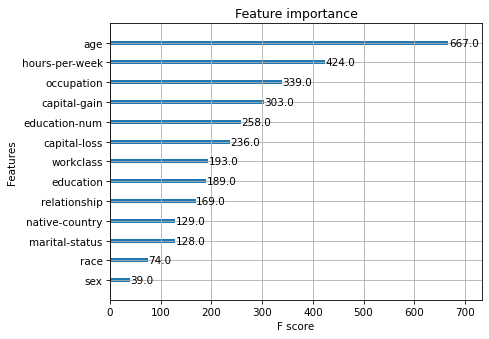

In [23]:
xgb_clf = xgboost.XGBClassifier().fit(X,y)

xgboost.plot_importance(xgb_clf, importance_type="weight");

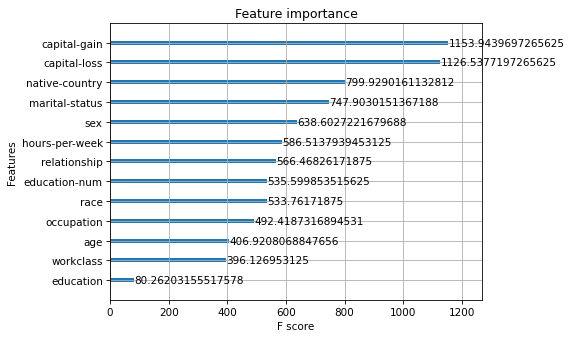

In [24]:
xgboost.plot_importance(xgb_clf, importance_type="cover");

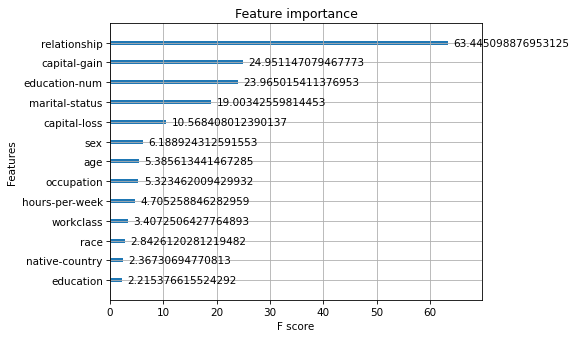

In [25]:
xgboost.plot_importance(xgb_clf, importance_type="gain");

### Problem of High Cardinality Features

Let us add a new feature which contains random numeric values, build a model and look at feature importances.

In [202]:
y = adult_encoded.loc[:,'y']
X = adult_encoded.drop(columns=['y'])
X["random_num"] = np.random.randn(X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier()
#model = RandomForestClassifier()

model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2426
         1.0       0.66      0.63      0.64       831

    accuracy                           0.82      3257
   macro avg       0.77      0.76      0.76      3257
weighted avg       0.82      0.82      0.82      3257



In [203]:
model = DecisionTreeClassifier().fit(X,y)
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)[:10]

,features,values
0,random_num,0.214519
1,relationship,0.197821
2,education-num,0.114705
3,capital-gain,0.113957
4,age,0.110121
5,hours-per-week,0.071643
6,occupation,0.055108
7,capital-loss,0.037939
8,workclass,0.036189
9,native-country,0.015927


As can be seen the random feature has a very high importance which should not be the case since it is contains randomly generated numbers. The reason behind this situation is that the model overfits the data. Since the default value of min_samples_split = 2, the tree model will split on these random feature to further decrease the impurity. So, there will be many splits on the leaf nodes or close to leaf nodes on the random feature.  The following codes show this in detail.

First, below you can see that the resulting tree is a big one.

In [197]:
print("Depth:",model.tree_.max_depth)
print("Node count:",model.tree_.node_count)

Depth: 46
Node count: 9559


Following function computes the average depth of nodes split on a feature in the resulting tree model.

In [198]:
def node_depth(tree, feature_idx):
    depth = 0
    node_depths = tree.compute_node_depths()
    for idx in range(len(tree.feature)):
        if tree.feature[idx] == feature_idx:
            depth += node_depths[idx]
    return depth/sum(tree.feature==feature_idx)
        

Following function accumulates the impurity reductions of a given feature in a list.

In [199]:
def all_feature_importances(tree, feature_idx):
    gains = []
    leaf_nodes = 0
    for idx in range(len(tree.feature)):
        if tree.feature[idx] == feature_idx:
            if tree.children_left[tree.children_left[idx]] == -1:
                leaf_nodes += 1
            gains.append(tree.n_node_samples[idx]*tree.impurity[idx] 
            - tree.n_node_samples[tree.children_left[idx]]*tree.impurity[tree.children_left[idx]]
            - tree.n_node_samples[tree.children_right[idx]]*tree.impurity[tree.children_right[idx]])
    return gains, leaf_nodes
        

As you can see below the number of nodes where the feature "random_num" appears is much more than the feature "relationship" and most of them are at the lower levels.

In [200]:
idx = list(model.feature_names_in_).index('random_num')
gains, leaf_nodes = all_feature_importances(model.tree_, idx)
print("Total gain:", sum(gains))
print("Number of nodes:", len(gains))
print("Number of leaf nodes:", leaf_nodes)
print("Avg. depth:", node_depth(model.tree_, idx))

Total gain: 2405.2464629094256
Number of nodes: 1828
Number of leaf nodes: 978
Avg. depth: 20.561816192560176


In [201]:
idx = list(model.feature_names_in_).index('relationship')
gains, leaf_nodes = all_feature_importances(model.tree_, idx)
print("Total gain:", sum(gains))
print("Number of nodes:", len(gains))
print("Number of leaf nodes:", leaf_nodes)
print("Avg. depth:", node_depth(model.tree_, idx))

Total gain: 2347.588807063101
Number of nodes: 37
Number of leaf nodes: 9
Avg. depth: 16.18918918918919


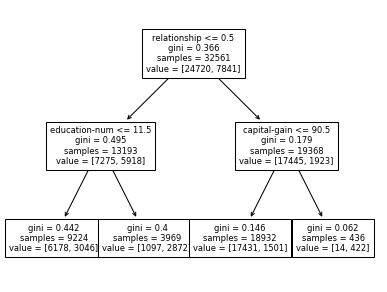

In [191]:
tree.plot_tree(model, feature_names=list(adult.columns), fontsize=8);

One solution to this problem might to constrain the model size by, for example, setting max_depth to a small value

In [204]:
model = DecisionTreeClassifier(max_depth=5)
#model = RandomForestClassifier()

model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91      2426
         1.0       0.83      0.52      0.64       831

    accuracy                           0.85      3257
   macro avg       0.84      0.74      0.77      3257
weighted avg       0.85      0.85      0.84      3257



In [205]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)[:10]

,features,values
0,relationship,0.457894
1,capital-gain,0.244020
2,education-num,0.226840
3,capital-loss,0.040521
4,age,0.012245
5,hours-per-week,0.011350
6,occupation,0.005914
7,random_num,0.000880
8,workclass,0.000335
9,native-country,0.000000


### Conclusions

- It is important not to forget that these scores only show the importance of a feature relative to a model. In other words how much a model relies on a feature. A feature which might not be used by a model does not mean that that feature is unimportant in general. This might happen, for example, when there are two important but correlated features. A decision tree will choose one of them and will not use the other one. This does not mean that the unused feature is not important in general.
- Another similar problem is this one: Suppose that feature A is very important, if you add a correlated feature B, and then train a random forest, then some of the trees will use feature A and some of the trees will use feature B. As a result, the importance of these features will decrease and you might not realize the actual importance of the feature.
- Feature importance scores are computed on the model which is fitted on the training set, therefore if a model overfits than the scores can be misleading. High cardinality features can cause this.
- It is better to evaluate the importance of a feature on the test set. Permutation importance can help at this point.

### Permutation Importance

Permutation importance of a feature in the decrease in model score when the values of that feature are randomly shuffled.

In [7]:
y = adult_encoded.loc[:,'y']
X = adult_encoded.drop(columns=['y'])
X["random_num"] = np.random.randn(X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier()
#model = RandomForestClassifier()

model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2428
         1.0       0.66      0.60      0.63       829

    accuracy                           0.82      3257
   macro avg       0.76      0.75      0.75      3257
weighted avg       0.81      0.82      0.82      3257



In [8]:
perm_test = permutation_importance(model, X_test, y_test)
perm_train = permutation_importance(model, X_train, y_train)

In [9]:
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

perm_imps_test = perm_test['importances_mean']
perm_sorted_idx_test = np.argsort(perm_imps_test)[::-1]
perm_sorted_vals_test = np.sort(perm_imps_test)[::-1]

perm_imps_train = perm_train['importances_mean']
perm_sorted_idx_train = np.argsort(perm_imps_train)[::-1]
perm_sorted_vals_train = np.sort(perm_imps_train)[::-1]

d = {"Perm. features Test":X.columns[perm_sorted_idx_test], "Perm. Imp. Test":perm_sorted_vals_test,"Perm. features Train":X.columns[perm_sorted_idx_train], "Perm. Imp.Train":perm_sorted_vals_train, "Feature Imp. features":X.columns[sorted_idx], "Feature Imp.":sorted_vals}
pd.DataFrame(d)

,Perm. features Test,Perm. Imp. Test,Perm. features Train,Perm. Imp.Train,Feature Imp. features,Feature Imp.
0,relationship,0.067178,relationship,0.173533,random_num,0.203672
1,capital-gain,0.040467,age,0.166933,relationship,0.198180
2,education-num,0.039914,education-num,0.152744,age,0.118632
3,age,0.029229,random_num,0.127962,education-num,0.116532
4,occupation,0.028124,occupation,0.127457,capital-gain,0.115103
5,hours-per-week,0.020632,hours-per-week,0.111248,hours-per-week,0.069514
6,random_num,0.013816,capital-gain,0.057146,occupation,0.059139
7,capital-loss,0.011974,workclass,0.050171,capital-loss,0.037472
8,marital-status,0.008904,capital-loss,0.021001,workclass,0.034534
9,education,0.005158,education,0.019840,native-country,0.014016


We can see that permutation importance of random_num is highest in impurity based importance scoring. It is also noteworty that random_num has high importance when permutation importance is measured on the training set. This is another evidence of overfitting. When we look at the permutation importance in the test set, random_num has very low importance. Permutation importance on the test set gives information about features' contribution to the generalization performance of the model.

Another advantage of permutation based features importance is that it can be used with any model (not just tree based models).

The question of whether to use trainig or test set for measuring permutation importance is not easy to answer because it is linked to what exactly we mean by feature importance. But to give a quick answer, if you want to understand the feature's contribution to the model prediction you should use training set. Actually, permutation feature importance on the training set is conceptually very similar to impurity based importance measures. The importance results in the above table confirms this, as the ranking of features by permutation importance on the trainig set and impurity based feature importance is very similar. On the other hand, if you want to understand a feature's contibution to the generalization performance of the model than you should measure feature importance on the test set. 

### More Datasets

In [13]:
#Bank Marketing Dataset from
#https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv("../../datasets/bank_marketing/bank/bank-full.csv", delimiter = ";")
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
X = bank.loc[:,'age':'poutcome']
#X["random_num"] = np.random.rand(X.shape[0])

# The following feature is  data leak
X.drop(columns=['duration'], inplace=True)

y = bank.loc[:,'y']
y = y.replace(["yes","no"],[1,0])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
 
model = DecisionTreeClassifier()
model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3980
           1       0.30      0.32      0.31       542

    accuracy                           0.83      4522
   macro avg       0.60      0.61      0.61      4522
weighted avg       0.83      0.83      0.83      4522



In [18]:
perm_test = permutation_importance(model, X_test, y_test)
perm_train = permutation_importance(model, X_train, y_train)

In [19]:
imps = clf.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

perm_imps_test = perm_test['importances_mean']
perm_sorted_idx_test = np.argsort(perm_imps_test)[::-1]
perm_sorted_vals_test = np.sort(perm_imps_test)[::-1]

perm_imps_train = perm_train['importances_mean']
perm_sorted_idx_train = np.argsort(perm_imps_train)[::-1]
perm_sorted_vals_train = np.sort(perm_imps_train)[::-1]

d = {"Perm. features Test":X.columns[perm_sorted_idx_test], "Perm. Imp. Test":perm_sorted_vals_test,"Perm. features Train":X.columns[perm_sorted_idx_train], "Perm. Imp.Train":perm_sorted_vals_train, "Feature Imp. features":X.columns[sorted_idx], "Feature Imp.":sorted_vals}
pd.DataFrame(d)

,Perm. features Test,Perm. Imp. Test,Perm. features Train,Perm. Imp.Train,Feature Imp. features,Feature Imp.
0,contact_unknown,0.048651,day,0.144673,balance,0.173208
1,day,0.046218,balance,0.120858,age,0.148931
2,month_apr,0.028439,age,0.102637,day,0.125204
3,month_jun,0.020124,contact_unknown,0.097181,campaign,0.063050
4,pdays,0.018045,marital_married,0.053449,pdays,0.046919
5,month_nov,0.014684,campaign,0.053100,poutcome_success,0.043351
6,month_may,0.009376,pdays,0.049330,previous,0.026047
7,month_feb,0.008359,month_apr,0.046656,education_secondary,0.015378
8,poutcome_success,0.007873,month_jun,0.041112,housing_yes,0.014723
9,housing_yes,0.007209,month_may,0.028882,job_technician,0.013649


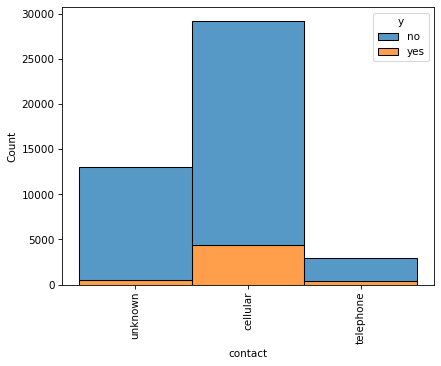

In [21]:
sns.histplot(data=bank, x="contact", hue="y", multiple="stack");
plt.xticks(rotation=90);

### Bike Sharing Dataset

In [22]:
bike = pd.read_csv("../../datasets/bike_sharing/day.csv")
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
bike.shape

(731, 16)

In [24]:
bike = pd.read_csv("../../datasets/bike_sharing/hour.csv")
bike.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
bike.shape

(17379, 17)